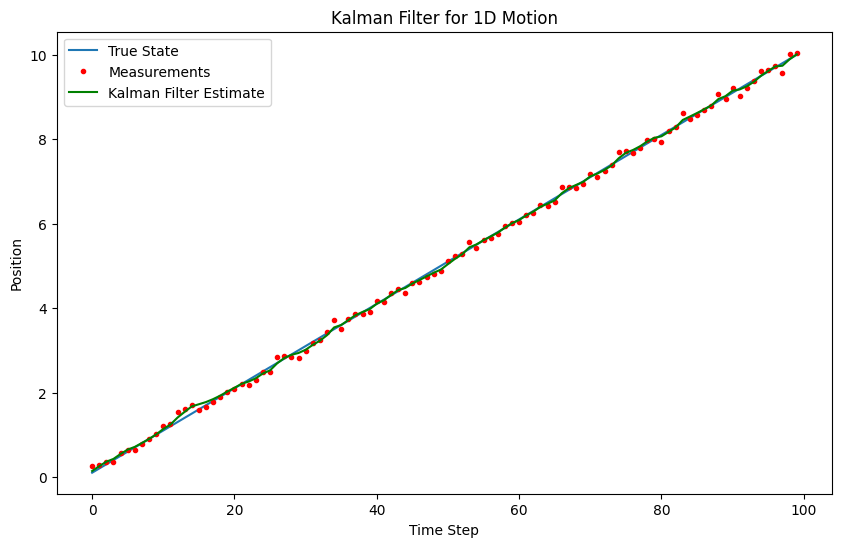

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class KalmanFilter:
    def __init__(self, F, H, Q, R, P, x0):
        self.F = F  # матрица перехода состояния
        self.H = H  # матрица наблюдения
        self.Q = Q  # ковариация шума процесса
        self.R = R  # ковариация шума измерения
        self.P = P  # начальная ковариация ошибки
        self.x = x0 # начальное состояние

    def predict(self):
        self.x = np.dot(self.F, self.x)
        self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.Q
        return self.x

    def update(self, z):
        y = z - np.dot(self.H, self.x)
        S = self.R + np.dot(self.H, np.dot(self.P, self.H.T))
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))
        self.x = self.x + np.dot(K, y)
        I = np.eye(self.H.shape[1])
        self.P = np.dot((I - np.dot(K, self.H)), self.P)
        return self.x

# Параметры модели
dt = 0.1
F = np.array([[1, dt], [0, 1]])
H = np.array([[1, 0]])
Q = np.array([[0.05, 0.05], [0.05, 0.05]])
R = np.array([[0.5]])
P = np.array([[0.1, 0.1], [0.1, 0.1]])
x0 = np.array([[0], [1]])

# Создаем фильтр Калмана
kf = KalmanFilter(F, H, Q, R, P, x0)

# Генерируем зашумленные измерения
true_states = []
measurements = []
estimated_states = []

for _ in range(100):
    true_state = np.dot(F, x0)
    measurement = np.dot(H, true_state) + np.random.normal(0, 0.1)

    kf.predict()
    estimated_state = kf.update(measurement)

    true_states.append(true_state[0, 0])
    measurements.append(measurement[0, 0])
    estimated_states.append(estimated_state[0, 0])

    x0 = true_state

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(true_states, label='True State')
plt.plot(measurements, 'r.', label='Measurements')
plt.plot(estimated_states, 'g-', label='Kalman Filter Estimate')
plt.legend()
plt.title('Kalman Filter for 1D Motion')
plt.xlabel('Time Step')
plt.ylabel('Position')
plt.show()